## importing libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## data preprocessing

### training image preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 60972 files belonging to 33 classes.


### validation image preprocessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,

    verbose=True,
)

Found 15229 files belonging to 33 classes.


In [5]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 33), dtype=tf.float32, name=None))>

In [6]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break
    

tf.Tensor(
[[[[179.   166.   160.  ]
   [178.25 165.25 159.25]
   [186.25 173.25 167.25]
   ...
   [177.25 164.25 156.25]
   [179.25 166.25 158.25]
   [178.75 165.75 157.75]]

  [[180.75 167.75 161.75]
   [183.5  170.5  164.5 ]
   [179.   166.   160.  ]
   ...
   [178.25 165.25 157.25]
   [179.75 166.75 158.75]
   [180.   167.   159.  ]]

  [[171.25 158.25 152.25]
   [176.75 163.75 157.75]
   [171.75 158.75 152.75]
   ...
   [182.5  169.5  161.5 ]
   [180.75 167.75 159.75]
   [180.5  167.5  159.5 ]]

  ...

  [[183.75 172.75 168.75]
   [190.   179.   175.  ]
   [193.   182.   178.  ]
   ...
   [190.75 180.75 178.75]
   [189.5  179.5  177.5 ]
   [188.5  178.5  176.5 ]]

  [[191.5  180.5  176.5 ]
   [183.5  172.5  168.5 ]
   [193.   182.   178.  ]
   ...
   [186.25 176.25 174.25]
   [185.75 175.75 173.75]
   [185.25 175.25 173.25]]

  [[203.75 192.75 188.75]
   [182.75 171.75 167.75]
   [179.5  168.5  164.5 ]
   ...
   [189.5  179.5  177.5 ]
   [191.5  181.5  179.5 ]
   [192.75 182.75 18

## building model

In [7]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [8]:
model = Sequential()

## Building Convolution Layer

In [9]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\Mayuri\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape={128,128,3}))
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape={128,128,3}))
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape={128,128,3}))
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Flatten())

In [13]:
model.add(Dense(units=1024,activation='relu'))

## compiling model


In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
#output layer
model.add(Dense(units=33,activation='softmax'))

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 63, 63, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 31, 31, 256)         │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 31, 31, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      58,983,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 33)                  │          33,825 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,820,609 (228.20 MB)

 Trainable params: 59,820,609 (228.20 MB)

 Non-trainable params: 0 (0.00 B)

## model training

In [17]:
training_history = model.fit(x=training_set, validation_data=validation_set,epochs=10)

Epoch 1/10
1906/1906 ━━━━━━━━━━━━━━━━━━━━ 12141s 6s/step - accuracy: 0.6347 - loss: 1.6384 - val_accuracy: 0.2644 - val_loss: 10.3608
Epoch 2/10
1906/1906 ━━━━━━━━━━━━━━━━━━━━ 76048s 40s/step - accuracy: 0.9394 - loss: 0.1845 - val_accuracy: 0.2595 - val_loss: 13.0621
Epoch 3/10
1906/1906 ━━━━━━━━━━━━━━━━━━━━ 7671s 4s/step - accuracy: 0.9688 - loss: 0.0950 - val_accuracy: 0.2675 - val_loss: 16.6107
Epoch 4/10
1906/1906 ━━━━━━━━━━━━━━━━━━━━ 55121s 29s/step - accuracy: 0.9800 - loss: 0.0599 - val_accuracy: 0.2683 - val_loss: 18.4987
Epoch 5/10
1906/1906 ━━━━━━━━━━━━━━━━━━━━ 2775s 1s/step - accuracy: 0.9856 - loss: 0.0465 - val_accuracy: 0.2676 - val_loss: 16.9546
Epoch 6/10
1906/1906 ━━━━━━━━━━━━━━━━━━━━ 95127s 50s/step - accuracy: 0.9894 - loss: 0.0336 - val_accuracy: 0.2707 - val_loss: 19.1813
Epoch 7/10
1906/1906 ━━━━━━━━━━━━━━━━━━━━ 12005s 6s/step - accuracy: 0.9914 - loss: 0.0276 - val_accuracy: 0.2675 - val_loss: 21.4210
Epoch 8/10
1906/1906 ━━━━━━━━━━━━━━━━━━━━ 13379s 7s/step - ac

###model evaluation

In [38]:
train_loss,train_acc = model.evaluate(training_set)

1906/1906 ━━━━━━━━━━━━━━━━━━━━ 1675s 879ms/step - accuracy: 0.9984 - loss: 0.0058


In [39]:
print(train_loss,train_acc)

0.004984637256711721 0.9985731244087219


In [22]:
val_loss,val_acc = model.evaluate(validation_set)

476/476 ━━━━━━━━━━━━━━━━━━━━ 135s 283ms/step - accuracy: 0.2751 - loss: 24.3048


In [40]:
print(val_loss,val_acc)

24.37150764465332 0.2708647847175598


### saving model

In [41]:
model.save("trained_model.keras")

In [42]:
training_history.history

{'accuracy': [0.7959555387496948,
  0.9531588554382324,
  0.9743652939796448,
  0.9829593896865845,
  0.9857803583145142,
  0.9903562068939209,
  0.9918814897537231,
  0.9924063682556152,
  0.9931443929672241,
  0.9932100176811218],
 'loss': [0.7371709942817688,
  0.14237470924854279,
  0.07903371751308441,
  0.05102042853832245,
  0.04521774500608444,
  0.03009902499616146,
  0.02623017318546772,
  0.02327212132513523,
  0.02159540168941021,
  0.020697493106126785],
 'val_accuracy': [0.2643640339374542,
  0.25950488448143005,
  0.2675159275531769,
  0.26830390095710754,
  0.267581582069397,
  0.27073347568511963,
  0.2675159275531769,
  0.2660713195800781,
  0.2679099142551422,
  0.2708647847175598],
 'val_loss': [10.360773086547852,
  13.06209945678711,
  16.610698699951172,
  18.498746871948242,
  16.954633712768555,
  19.181310653686523,
  21.42099380493164,
  22.589086532592773,
  21.85767936706543,
  24.371501922607422]}

In [43]:
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [44]:
training_history.history['accuracy']
training_history.history['val_accuracy']

[0.2643640339374542,
 0.25950488448143005,
 0.2675159275531769,
 0.26830390095710754,
 0.267581582069397,
 0.27073347568511963,
 0.2675159275531769,
 0.2660713195800781,
 0.2679099142551422,
 0.2708647847175598]

### Accuracy visualization

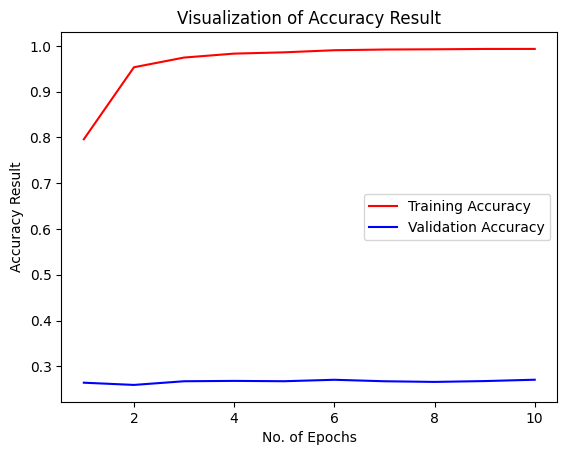

In [45]:
epochs = [i for i in range(1,11)]
plt.plot(epochs, training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### some other metrics for model evaluation

In [46]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

In [47]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    
    verbose=True,
)

Found 15229 files belonging to 33 classes.


In [48]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

476/476 ━━━━━━━━━━━━━━━━━━━━ 253s 531ms/step


(array([[9.9999857e-01, 1.4847803e-06, 1.5857534e-12, ..., 9.8863394e-18,
         1.6473729e-16, 2.9736508e-12],
        [9.9999225e-01, 7.4123450e-06, 8.2301185e-13, ..., 1.6920653e-18,
         1.7871625e-19, 4.7182657e-15],
        [1.0000000e+00, 4.2323943e-08, 1.9778026e-14, ..., 6.4252293e-17,
         2.0827554e-16, 5.5429582e-15],
        ...,
        [8.5066737e-21, 1.7500755e-21, 2.4070252e-22, ..., 1.0673856e-15,
         7.7172642e-17, 5.2914914e-14],
        [1.5786176e-11, 4.8744103e-10, 1.8156436e-04, ..., 1.7648662e-04,
         1.9893285e-02, 5.6351250e-01],
        [6.6907862e-13, 8.7041713e-13, 2.9352907e-07, ..., 3.6797153e-06,
         9.9937087e-01, 3.8418971e-08]], dtype=float32),
 (15229, 33))

In [49]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [50]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [51]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    
    verbose=True,
)

Found 15229 files belonging to 33 classes.


In [55]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

476/476 ━━━━━━━━━━━━━━━━━━━━ 247s 513ms/step


(array([[9.9999857e-01, 1.4847803e-06, 1.5857534e-12, ..., 9.8863394e-18,
         1.6473729e-16, 2.9736508e-12],
        [9.9999225e-01, 7.4123450e-06, 8.2301185e-13, ..., 1.6920653e-18,
         1.7871625e-19, 4.7182657e-15],
        [1.0000000e+00, 4.2323943e-08, 1.9778026e-14, ..., 6.4252293e-17,
         2.0827554e-16, 5.5429582e-15],
        ...,
        [8.5066737e-21, 1.7500755e-21, 2.4070252e-22, ..., 1.0673856e-15,
         7.7172642e-17, 5.2914914e-14],
        [1.5786176e-11, 4.8744103e-10, 1.8156436e-04, ..., 1.7648662e-04,
         1.9893285e-02, 5.6351250e-01],
        [6.6907862e-13, 8.7041713e-13, 2.9352907e-07, ..., 3.6797153e-06,
         9.9937087e-01, 3.8418971e-08]], dtype=float32),
 (15229, 33))

In [57]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [58]:
predicted_categories

<tf.Tensor: shape=(15229,), dtype=int64, numpy=array([ 0,  0,  0, ..., 28, 32, 31], dtype=int64)>

In [60]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(15229, 33), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [61]:
Y_true= tf.argmax(true_categories,axis=1)

In [62]:
Y_true

<tf.Tensor: shape=(15229,), dtype=int64, numpy=array([ 0,  0,  0, ..., 32, 32, 32], dtype=int64)>


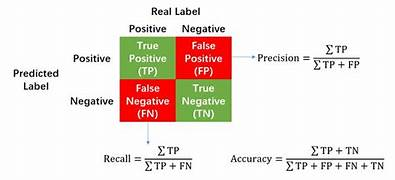

In [71]:
!pip install scikit-learn



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 1.5 MB/s eta 0:00:07
   -- ------------------------------------- 0.8/11.0 MB 1.5 MB/s eta 0:00:07
   ---- ----------------------------------- 1.3/11.0 MB 1.7 MB/s eta 0:00:06
   ----- ---------------------------------- 1.6/11.0 MB 1.8 MB/s eta 0:00:06
   ------- -------------------------------- 2.1/11.0 MB 1.9 MB/s eta 0:00:05
   --------- ------------------------------ 2.6/11.0 MB 2.0 MB/s eta 0:00:05
   ----------- ---------------------------- 3.1/11.0 MB 2.1 MB/s eta 0:00:04
   ------------- -------------------------- 3.7/11.0 MB 2.1 MB/s eta 0:00:04
   --------------- ------------------------ 4.2/11.0 MB 2.2 MB/s eta 0:00:04
   ----------------- ---------------------- 4.7/11.0 MB 2.3 MB/s eta 0:00:03
   ------------------ --------------------- 5.0/11.0 MB 2.2 MB/s eta 0:00:03
   ---------

In [78]:
from sklearn.metrics import classification_report,confusion_matrix

In [77]:
print(classification_report(Y_true, predicted_categories, target_names=class_name))


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.94      0.95       504
                                 Apple___Black_rot       0.96      0.99      0.97       497
                          Apple___Cedar_apple_rust       0.93      0.98      0.96       440
                                   Apple___healthy       0.90      0.94      0.92       502
                               Blueberry___healthy       0.95      0.99      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.98      0.98       421
                 Cherry_(including_sour)___healthy       0.97      1.00      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.91      0.94       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
                      Grape___Esca_(Black_Measles)       0.00      0.00      0.

In [79]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[476,  10,   0, ...,   0,   3,   3],
       [  2, 491,   0, ...,   0,   0,   1],
       [  0,   0, 432, ...,   0,   0,   1],
       ...,
       [  0,   0,   0, ...,  50,  17,  63],
       [  3,   2,   8, ...,  11,   2,  95],
       [  0,   0,  11, ...,  26,  62,  16]], dtype=int64)

### confusion matrix visualization

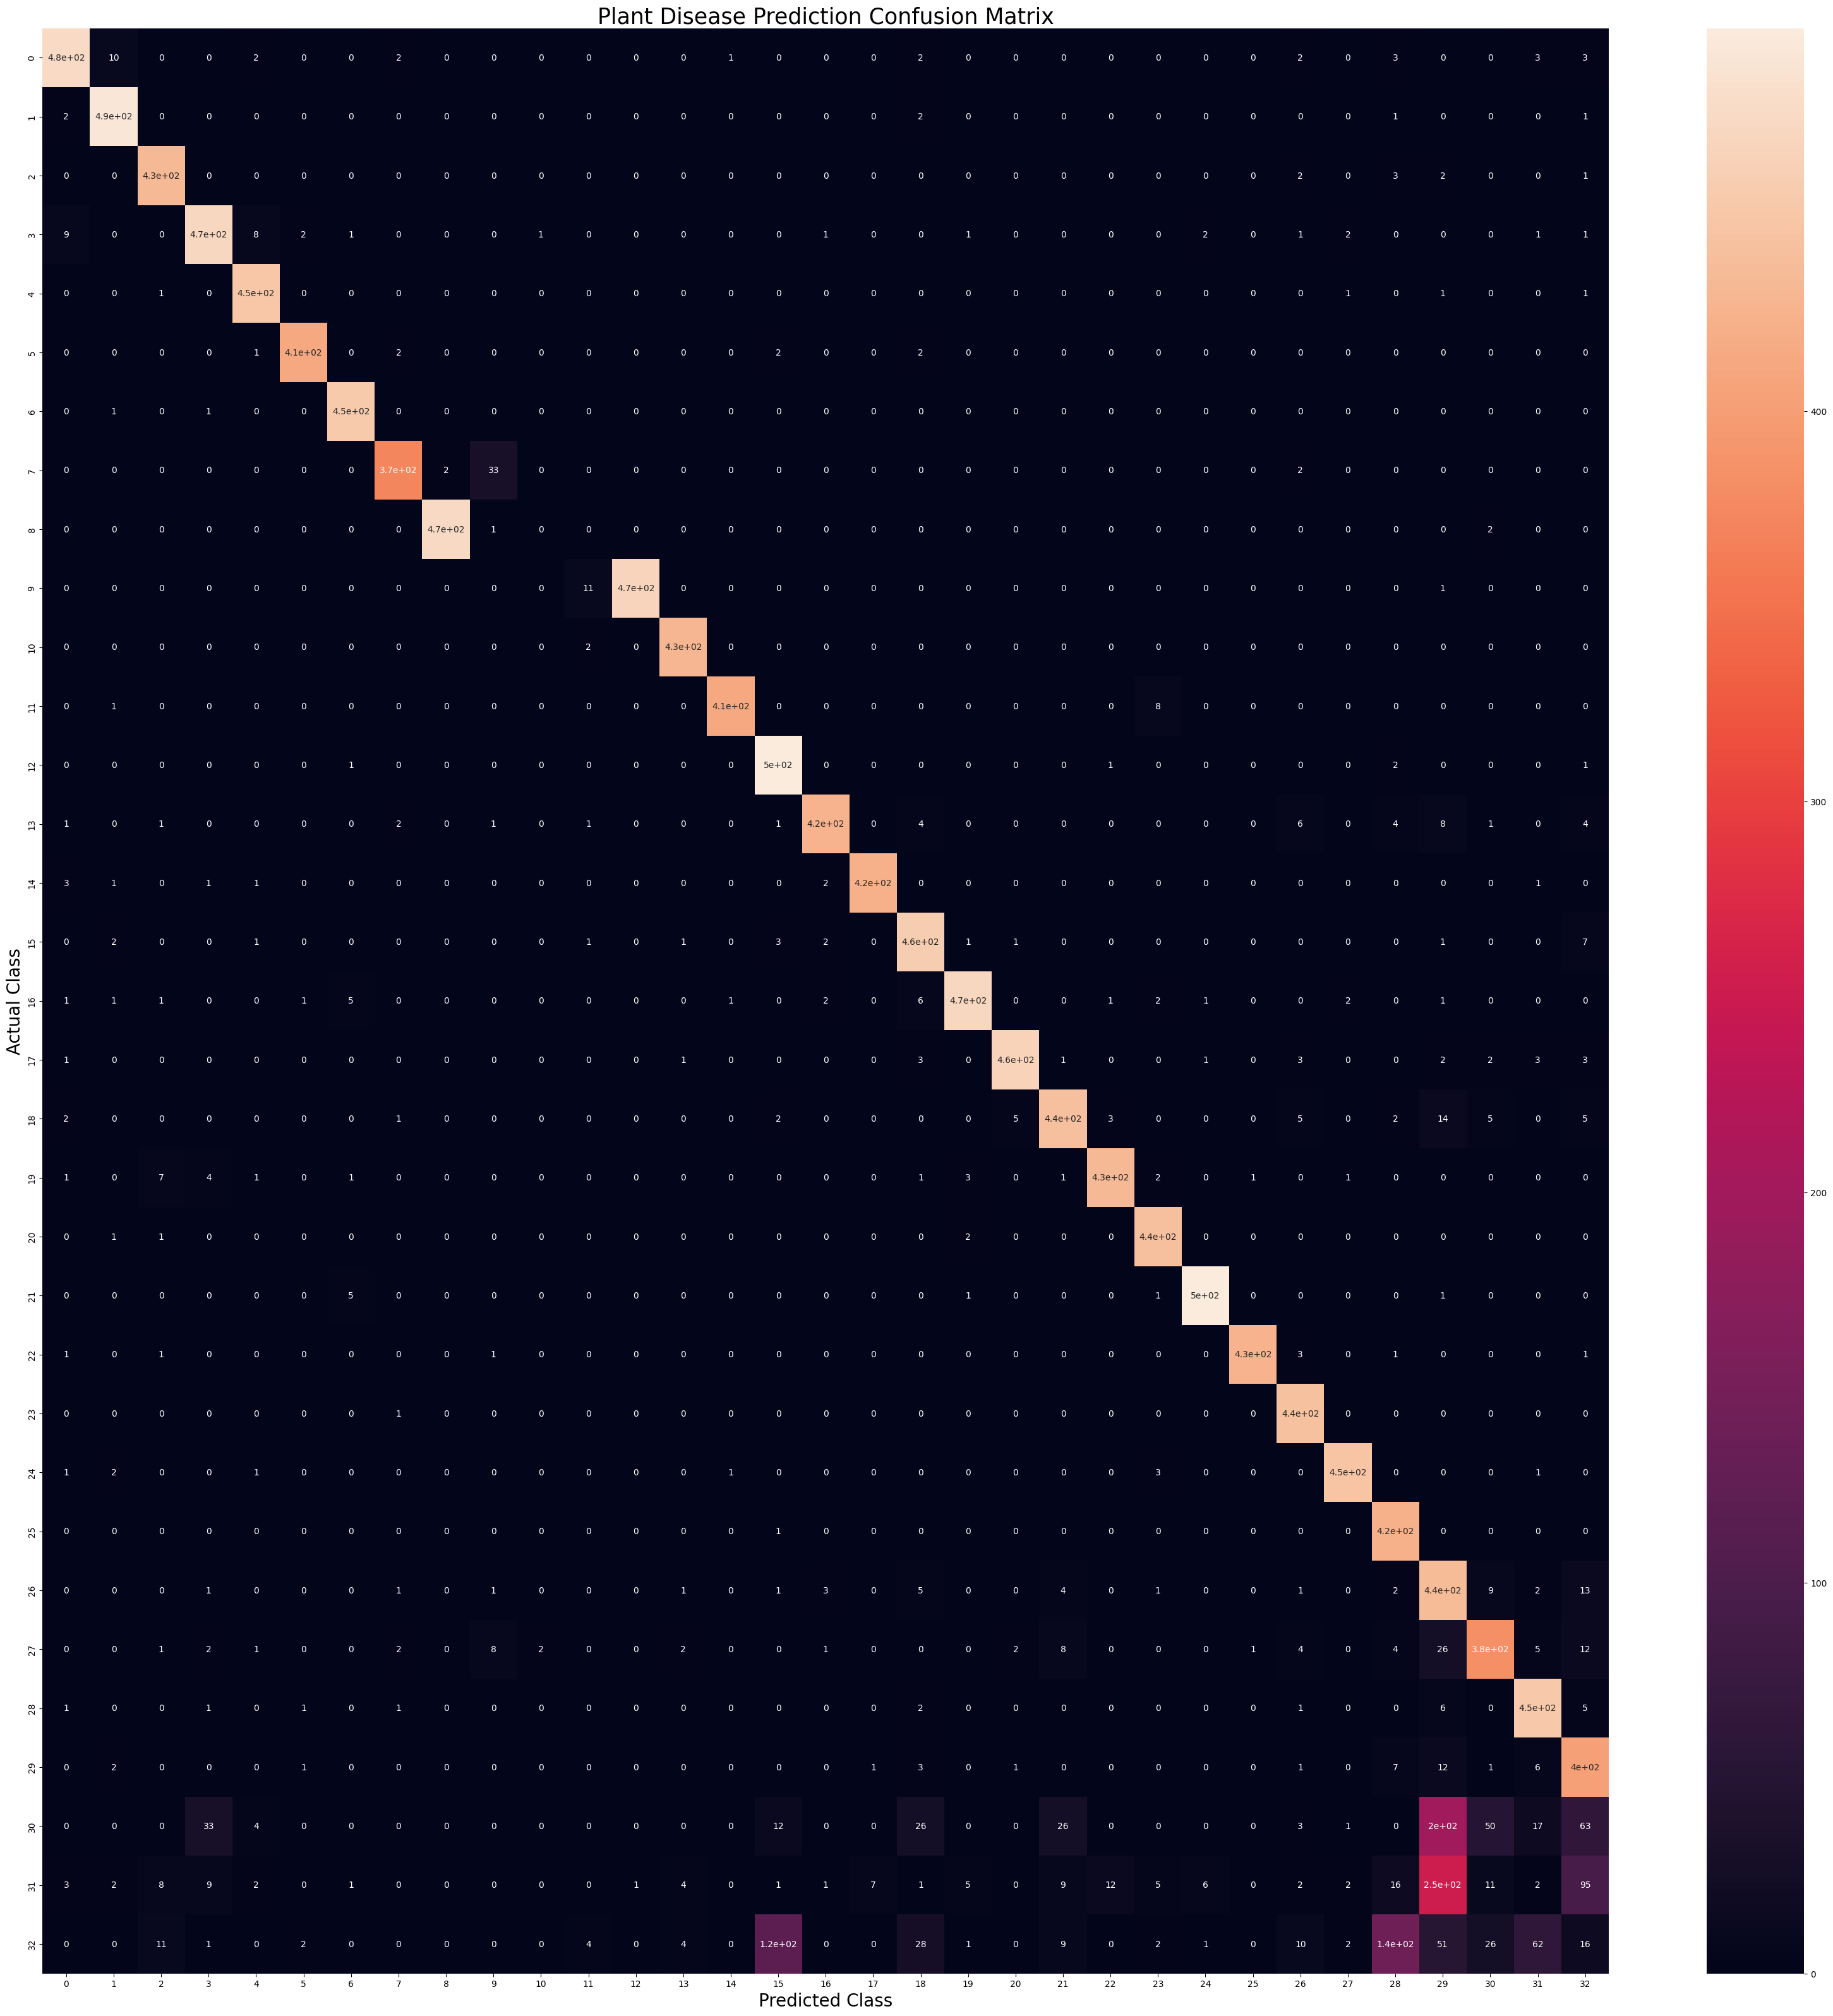

In [83]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class", fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()